In [0]:
import pandas as pd
import numpy as np

# FOR PLOTTING GRAPHS
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth',300)

# FOR REMOVING SPECIAL CHARACTERS, LINKS, AND EXPANDING WORDS
import re
import unicodedata

# FOR STEMMING AND REMOVING STOP WORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer   
from nltk.corpus import wordnet
from nltk import pos_tag

# FOR BUILDING THE EMBEDDING MATRIX AND GENERATING THE SEQUENCES
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

# FOR THE GOOGLE WORD TO VECTOR WEIGHTS
import gensim

In [0]:
# IMPORTING THE DATASET
train_data=pd.read_csv("TrainingData.csv")
test_data=pd.read_csv("SubtaskA_Trial_Test_Labeled.csv")
valid_data=pd.read_csv("SubtaskA_EvaluationData_labeled.csv")

In [0]:
# PEEKING INTO THE TRAIN DATA
print(train_data.shape)
train_data.head()

(8500, 3)


,id,sentence,label
0,663_3,"""Please enable removing language code from the Dev Center ""language history"" For example if you ever selected ""ru"" and ""ru-ru"" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.""",1
1,663_4,"""Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the ""ru"" language code and published my new xap version, the old xap version still remains in the Store with ""Replaced and unpublished"".""",0
2,664_1,"""Wich means the new version not fully replaced the old version and this causes me very serious problems: 1.""",0
3,664_2,"""Some of my users will still receive the old xap version of my app.""",0
4,664_3,"""The store randomly gives the old xap or the new xap version of my app.""",0


In [0]:
# PEEKING INTO THE VALIDATION DATA
print(valid_data.shape)
valid_data.head()

(833, 3)


,id,sentence,label
0,9566,This would enable live traffic aware apps.,0
1,9569,Please try other formatting like bold italics shadow to distinguish titles/subtitles from content.,1
2,9576,Since computers were invented to save time I suggest we be allowed to upload them all in one zip file - using numbering for the file names and the portal could place them in the right order.,1
3,9577,Allow rearranging if the user wants to change them!,1
4,9579,Add SIMD instructions for better use of ARM NEON instructions for math and games.,1


In [0]:
# PEEKING INTO THE TEST DATA
print(test_data.shape)
test_data.head()

(592, 3)


,id,sentence,label
0,1310_1,"I'm not asking Microsoft to Gives permission like Android so any app can take my data, but don't keep it restricted like iPhone.",1
1,1312_1,somewhere between Android and iPhone.,0
2,1313_1,And in the Windows Store you can flag the App [Requires Trust] for example.,0
3,1313_2,"Many thanks Sameh Hi, As we know, there is a lot of limitations is WP8 OS due the high security in the OS itself which is very good, but some time we need to allow some apps to do extra works, apps which we trust i.e: hotmail app, facebook app, skype app ....",0
4,1313_3,"The idea is that we can develop a regular app and we request our permissions in the manifest, OR the app can ASK FOR TRUST_�_ more",1


In [0]:
#####################################################################################
##########################        CLEANING THE DATA        ##########################
#####################################################################################

In [0]:
## REMOVING ASCENTED CHARACTERS LIKE é
def removeAscentedCharacters(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [0]:
# COMMON FUNCTION TO PRINT ALL VALUES AFTER UPDATION
def printAll(old,new,mx=10000):
  for x in range(min(len(old),mx)):
    print(x,"OLD: ",old[x])
    print(x,"NEW: ",new[x])

In [0]:
# COMMON FUNCTION TO PRINT VALUES AFTER UPDATION THAT DIFFERS
def printDiff(old,new,mx=10000):
  for x in range(min(len(old),mx)):
    if(old[x]!=new[x]):
      print(x,"OLD: ",old[x])
      print(x,"NEW: ",new[x])

In [0]:
# REMOVING ASCENTED CHARACTERS
old =  train_data['sentence']
cleaned = old.apply(lambda x: removeAscentedCharacters(x))
printAll(old,cleaned,1000)

Streaming output truncated to the last 5000 lines.
6000 NEW:  "NV12 and Gray8 are two basic formats but they don't be supported."
6001 OLD:  "When we get the pure image data without image file head info we donât want to chang the pure data."
6001 NEW:  "When we get the pure image data without image file head info we donat want to chang the pure data."
6002 OLD:  "will waste in performance."
6002 NEW:  "will waste in performance."
6003 OLD:  "Reveal style AppBarButtonRevealStyle applied on an appbarbutton inside CommandBar whit property DefaultLabelPosition=Right not work in sdk 15232"
6003 NEW:  "Reveal style AppBarButtonRevealStyle applied on an appbarbutton inside CommandBar whit property DefaultLabelPosition=Right not work in sdk 15232"
6004 OLD:  "In UWP when a MenuFlyout control is placed within a CommandBar inside the Page.TopAppBar (or BottomAppBar) in Light theme the MenuFlyoutPresenter has the incorrect background color."
6004 NEW:  "In UWP when a MenuFlyout control is place

In [0]:
printDiff(old,cleaned,1000)

784 OLD:  "windowsphone8.1____________î«_____________________________________________________________________________________________________________________________________________8.1__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________Ç_______________________________________________________________________________________________________________________________________________________________________________________"
784 NEW:  "windowsphone8.1____________i_____________________________________________________________________________________________________________________________________________8.1___________________________________________________________________________________________________________________________________________________________________________________________________________________

In [0]:
CONTRACTION_MAP = {"ain't": "is not","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because","could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not","doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not","haven't": "have not","he'd": "he would","he'd've": "he would have","he'll": "he will","he'll've": "he he will have","he's": "he is","how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is","I'd": "I would","I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have","i'd": "i would","i'd've": "i would have","i'll": "i will","i'll've": "i will have","i'm": "i am","i've": "i have","isn't": "is not","it'd": "it would","it'd've": "it would have","it'll": "it will","it'll've": "it will have","it's": "it is","let's": "let us","ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have","mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have","she'd": "she would","she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is","should've": "should have","shouldn't": "should not","shouldn't've": "should not have","so've": "so have","so's": "so as","that'd": "that would","that'd've": "that would have","that's": "that is","there'd": "there would","there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have","they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have","wasn't": "was not","we'd": "we would","we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are","we've": "we have","weren't": "were not","what'll": "what will","what'll've": "what will have","what're": "what are","what's": "what is","what've": "what have","when's": "when is","when've": "when have","where'd": "where did","where's": "where is","where've": "where have","who'll": "who will","who'll've": "who will have","who's": "who is","who've": "who have","why's": "why is","why've": "why have","will've": "will have","won't": "will not","won't've": "will not have","would've": "would have","wouldn't": "would not","wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would","you'd've": "you would have","you'll": "you will","you'll've": "you will have","you're": "you are","you've": "you have"}

In [0]:
## EXPANDING THE SHORT WORDS:
def expandContractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [0]:
# EXPANDING CONTRACTIONS
old =  cleaned
cleaned=old.apply(lambda x: expandContractions(x))
printDiff(old,cleaned)

8 OLD:  "It should be an option to remove the "ru" language code from my app 'language History' or an option to completly replace: Fully replace the prevoius(es) xap(s)."
8 NEW:  "It should be an option to remove the "ru" language code from my app language History or an option to completly replace: Fully replace the prevoius(es) xap(s)."
22 OLD:  "Don't recognize commands."
22 NEW:  "Do not recognize commands."
35 OLD:  "I've been working on an LOB for my field of engineering (civil/structural)."
35 NEW:  "I have been working on an LOB for my field of engineering (civil/structural)."
37 OLD:  "And because the same app runs on tablets and PC's, our engineers can work in the field, come back to their office, and continue working with the same data on their PC's."
37 NEW:  "And because the same app runs on tablets and PCs, our engineers can work in the field, come back to their office, and continue working with the same data on their PCs."
40 OLD:  "But I've found that windows phone 8.1 f

In [0]:
## REMOVING FRONT AND BACK INVERTED COMMAS
def removeIC(text):
    if len(text)>=2:
      if text[0]=='"':
        text = text[1:]
      if text[-1]=='"':
        text = text[:-1]
    return text

old= cleaned
cleaned=  old.apply(lambda x: removeIC(x))
printDiff(old,cleaned,1000)

Streaming output truncated to the last 5000 lines.
4617 NEW:  Moreover kidscorner are not used by most of the bachelors.
4618 OLD:  "Atleast remove password for kidscorner or make another password for kidscorner."
4618 NEW:  Atleast remove password for kidscorner or make another password for kidscorner.
4619 OLD:  "Allow debit cards as a payment instrument for registration and renewals"
4619 NEW:  Allow debit cards as a payment instrument for registration and renewals
4620 OLD:  "Better support for Commands for all controls, allowing to bind a Command in the ViewModel to any event from a supported control in XAML, without having to use third party tools such as MVVM Light."
4620 NEW:  Better support for Commands for all controls, allowing to bind a Command in the ViewModel to any event from a supported control in XAML, without having to use third party tools such as MVVM Light.
4621 OLD:  "(no offense MVVM Light ;) )"
4621 NEW:  (no offense MVVM Light ;) )
4622 OLD:  "Please using Noki

In [0]:
printAll(old,cleaned,100)

0 OLD:  "Please enable removing language code from the Dev Center "language history" For example if you ever selected "ru" and "ru-ru" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad."
0 NEW:  Please enable removing language code from the Dev Center "language history" For example if you ever selected "ru" and "ru-ru" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.
1 OLD:  "Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the "ru" language code and published my new xap version, the old xap version still remains in the Store with "Replaced and unpublished"."
1 NEW:  Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the "

In [0]:
# REMOVING HTML TAGS
def remove_tags(text):
  soup = BeautifulSoup(text)
  return soup.get_text()

In [0]:
old= cleaned
cleaned = old.apply(lambda x: remove_tags(x))
printDiff(old,cleaned,1000)

/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://windowsphone.uservoice.com/forums/101801-feature-suggestions/suggestions/6080912-we-want-open-the-app-by-tap-the-quick-status-icon" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://forums.wpcentral.com/windows-phone-apps/235446-wi-fi-analyzer-possible-wp8.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.6/dist-packages/bs4/__init__.py:336: UserWarning: "http://www.pitorque.de/MisterGoodcat/post/Somethings-Missing-from-t

1 OLD:  Note: in your .csproj file, there is a SupportedCultures entry like this: <SupportedCultures>de-DE;ru;ru-RU </SupportedCultures> When I removed the "ru" language code and published my new xap version, the old xap version still remains in the Store with "Replaced and unpublished".
1 NEW:  Note: in your .csproj file, there is a SupportedCultures entry like this: de-DE;ru;ru-RU  When I removed the "ru" language code and published my new xap version, the old xap version still remains in the Store with "Replaced and unpublished".
17 OLD:  But if I press power button and unlock device and open phone and say "call <person name, device start calling correctly!
17 NEW:  But if I press power button and unlock device and open phone and say "call 
238 OLD:  <ListView Grid.Row="1" SelectionMode="None" IsItemClickEnabled="False" ItemsSource="{Binding Source={StaticResource csvList}}"> <ListView.GroupStyle> <GroupStyle > <GroupStyle.HeaderTemplate> <DataTemplate > <Grid> <Border BorderThickne

In [0]:
# REMOVING LINKS
old= cleaned
cleaned = old.str.replace("(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*"," ")
printAll(old,cleaned,1000)

0 OLD:  Please enable removing language code from the Dev Center "language history" For example if you ever selected "ru" and "ru-ru" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.
0 NEW:  Please enable removing language code from the Dev Center "language history" For example if you ever selected "ru" and "ru-ru" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.
1 OLD:  Note: in your .csproj file, there is a SupportedCultures entry like this: de-DE;ru;ru-RU  When I removed the "ru" language code and published my new xap version, the old xap version still remains in the Store with "Replaced and unpublished".
1 NEW:  Note: in your .csproj file, there is a SupportedCultures entry like this: de-DE;ru;ru-RU  When I removed the "ru" language code and published my new xap version, the old xap version still rema

In [0]:
# REMOVING SPECIAL CHARACTERS
old= cleaned
cleaned = old.str.replace("\".*?\"|\(.*?\)|<.*>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});|[^a-zA-Z#]"," ")
printAll(old,cleaned,1500)

0 OLD:  Please enable removing language code from the Dev Center "language history" For example if you ever selected "ru" and "ru-ru" laguages and you published this xap to the Store then it causes Tile localization to show the en-us(default) tile localization which is bad.
0 NEW:  Please enable removing language code from the Dev Center   For example if you ever selected   and   laguages and you published this xap to the Store then it causes Tile localization to show the en us  tile localization which is bad 
1 OLD:  Note: in your .csproj file, there is a SupportedCultures entry like this: de-DE;ru;ru-RU  When I removed the "ru" language code and published my new xap version, the old xap version still remains in the Store with "Replaced and unpublished".
1 NEW:  Note  in your  csproj file  there is a SupportedCultures entry like this  de DE ru ru RU  When I removed the   language code and published my new xap version  the old xap version still remains in the Store with   
2 OLD:  Wich

In [0]:
# COMMON EMOJIS
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

old=cleaned
cleaned = old.apply(lambda x: deEmojify(x))
printDiff(old,cleaned)

In [0]:
# REMOVING EXTRA SPACES
def removeSpaces(text):
  text= re.sub(' +', ' ', text)
  if text[0]==' ':
    text=text[1:]
  return text

old=cleaned
cleaned=old.apply(lambda x: removeSpaces(x))
printDiff(old,cleaned,100)

0 OLD:  Please enable removing language code from the Dev Center   For example if you ever selected   and   laguages and you published this xap to the Store then it causes Tile localization to show the en us  tile localization which is bad 
0 NEW:  Please enable removing language code from the Dev Center For example if you ever selected and laguages and you published this xap to the Store then it causes Tile localization to show the en us tile localization which is bad 
1 OLD:  Note  in your  csproj file  there is a SupportedCultures entry like this  de DE ru ru RU  When I removed the   language code and published my new xap version  the old xap version still remains in the Store with   
1 NEW:  Note in your csproj file there is a SupportedCultures entry like this de DE ru ru RU When I removed the language code and published my new xap version the old xap version still remains in the Store with 
2 OLD:  Wich means the new version not fully replaced the old version and this causes me ve

In [0]:
# NORMALIZING THE SENTENCE CASE
old=cleaned
cleaned = old.apply(lambda x: x.lower())
printDiff(old,cleaned)

Streaming output truncated to the last 5000 lines.
5931 NEW:  that way would be very beneficial 
5932 OLD:  I do not need to call OMSetRenderTargets for each draw call where I want to change D DSV READ ONLY DEPTH 
5932 NEW:  i do not need to call omsetrendertargets for each draw call where i want to change d dsv read only depth 
5933 OLD:  Say I have objects to draw 
5933 NEW:  say i have objects to draw 
5934 OLD:  SP do not do depth writes but they do depth testsa more
5934 NEW:  sp do not do depth writes but they do depth testsa more
5935 OLD:  See GitHub issue for more information and scenarios 
5935 NEW:  see github issue for more information and scenarios 
5936 OLD:  it is extremely annoying when I face service issues with devcenter with no knowledge if they are investigated or not 
5936 NEW:  it is extremely annoying when i face service issues with devcenter with no knowledge if they are investigated or not 
5937 OLD:  I do not want all the time contact support wait wait and yea

In [0]:
# REMOVING DUPLICATE WORDS THAT OCCURS CONSECUTIVELY
old=cleaned
cleaned = old.apply(lambda x: re.sub(r'\b(.+)\s+\1\b', r'\1', x))
printDiff(old,cleaned,1000)

1 OLD:  note in your csproj file there is a supportedcultures entry like this de de ru ru when i removed the language code and published my new xap version the old xap version still remains in the store with 
1 NEW:  note in your csproj file there is a supportedcultures entry like this de ru when i removed the language code and published my new xap version the old xap version still remains in the store with 
380 OLD:  details handset nokia lumia operator uk unstable zero ceullar data after updating to wp earlier wp update was fine data is working fine on wi fi problem occurs when switching to cellular data cellular data works for a few minutes then goes off ie reports error cannot find server or dns error apps just do not work facebook reports problem getting data cellular data the icons keep flickering between h and from g to g toggling airline mode on off restores data for a few minutes then shuts off checked apn settings are correct even manually added an identical apn profile but t

In [0]:
nltk.download('stopwords')
#### CACHING THE STOP WORDS HELPS IN FASTENING THE REMOVAL OF THE STOP WORDS
cachedStopWords = stopwords.words("english")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

lemmatizer=WordNetLemmatizer()
corpus_words = set(nltk.corpus.words.words())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [0]:
# REMOVING STOP WORDS
tokenized_sentence = cleaned.apply(lambda x: x.split())
tokenized_sentence = tokenized_sentence.apply(lambda sentence: [word for word in sentence if len(word)>2 ])
tokenized_sentence = tokenized_sentence.apply( lambda sentence: [word for word in sentence if word not in cachedStopWords] )

In [0]:
# DEFINING THE STEMMING FUNCTION
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  

# OUR STEMMING FUNCTION
def stem(words):
  output_words=[]
  if len(words)!=0:
    words[0] = words[0].lower()
  for w in words:
          pos=pos_tag([w])
          simple_pos = get_simple_pos(pos[0][1])
          clean_word=lemmatizer.lemmatize(w,simple_pos)
          output_words.append(clean_word.lower())
  return output_words

def stemmizeSentence(sentence):
  output_words = stem(sentence)
  output_wordsf = []
  for i in output_words:
    if i in corpus_words:
      output_wordsf.append(i)
  return output_wordsf

In [0]:
# APPLYING STEMMING
tokenized_sentence = tokenized_sentence.apply(lambda sentence: stemmizeSentence(sentence))
# DETOKENIZING THE TOKENS BACK TO THE SENTENCES
detokenized= tokenized_sentence.apply(lambda x: ' '.join(x))

In [0]:
print(detokenized)

0       please enable remove language code dev center example ever select publish store cause tile localization show tile localization bad
1                                            note file entry like remove language code publish new version old version still remains store
2                                                                         mean new version fully replace old version cause serious problem
3                                                                                                           user still receive old version
4                                                                                                      store randomly give old new version
                                                                       ...                                                                
8495                                                                                                follow reliably throw flavor exception
8496                       

In [0]:
# VISUALIZING THE COMMON WORDS IN SUGGESTIONS AND NORMAL WORDS
from wordcloud import WordCloud
def generateImage(words):
    wordcloud = WordCloud(width=1200,height=500,random_state=21,max_font_size=110).generate(words)
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [0]:
train_data['clean']=detokenized

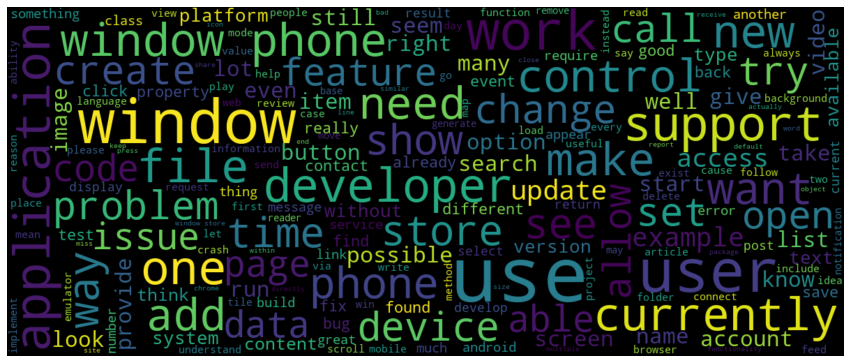

In [0]:
# COMMON WORDS IN NORMAL SENTENCES
normal_words=' '.join([text for text in train_data['clean'][train_data['label']==0]])
generateImage(normal_words)

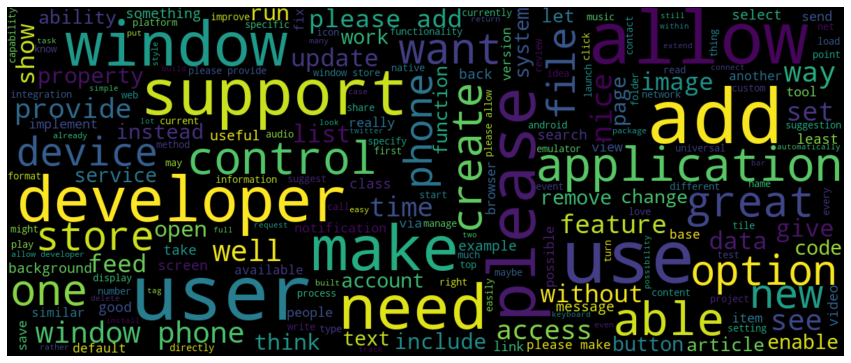

In [0]:
# COMMON WORDS IN SUGGESTIVE SENTENCES
suggestion_words=' '.join([text for text in train_data['clean'][train_data['label']==1]])
generateImage(suggestion_words)

In [0]:
# NO ACCURATE CONCLUSION CAN BE OBTAINED BY LOOKING AT THE FREQUNET WORDS IN THE CLASSES! NEED TO HAVE A MODEL FOR 
# ACCURATELY CLASSIFYING THE SENTENCES